In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from pandas import DataFrame,Series
import os

import scipy as stats
sns.set()

from sklearn import linear_model

In [30]:
data=pd.read_csv(r"C:\Users\khato\Downloads\Oil and Gas 1932-2014.csv\Oil and Gas 1932-2014.csv")

In [31]:
data.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774


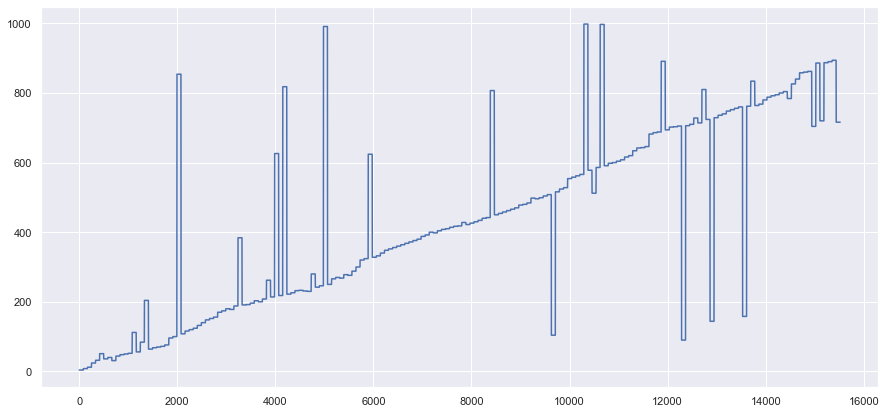

In [32]:
data["iso3numeric"].plot(figsize=(15,7))

In [33]:
data.describe()

,iso3numeric,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
count,15521.000000,15521.000000,1.010300e+04,15503.000000,15521.000000,1.010300e+04,1.010300e+04,1.010300e+04,8812.000000,1.552100e+04,...,4016.000000,3.880000e+03,3875.000000,3875.000000,1.290100e+04,1.180400e+04,15521.000000,15521.000000,15521.000000,1.552100e+04
mean,440.102055,1973.000000,1.834108e+07,26.513076,19.407381,4.049737e+09,4.777023e+09,6.567325e+09,100.702009,1.403597e+07,...,-0.357088,-1.944983e+07,60.045237,338.550092,2.822745e+07,2.729075e+07,0.676954,4.674194,6.425958,1.374774e+00
std,266.690184,23.959069,6.384938e+07,21.459869,27.819908,2.017801e+10,2.100122e+10,2.887193e+10,462.242415,1.102009e+07,...,146.611793,3.552873e+09,562.366542,2182.837956,9.860353e+07,9.488217e+07,0.467655,3.873224,5.324805,8.016068e-14
min,4.000000,1932.000000,0.000000e+00,7.879107,0.670000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-810.271076,-3.290943e+10,-918.095672,-7760.660272,2.510100e+04,2.510100e+04,0.000000,0.727393,1.000000,1.374774e+00
25%,204.000000,1952.000000,0.000000e+00,11.710310,1.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-5.524986,-8.709102e+07,-8.372933,-81.010366,2.194275e+06,2.108201e+06,0.000000,1.161943,1.597409,1.374774e+00
50%,422.000000,1973.000000,4.980000e+04,14.067980,3.290000,2.064857e+06,7.171990e+06,9.859862e+06,0.000000,1.472159e+07,...,0.000000,0.000000e+00,0.000000,0.000000,6.469000e+06,6.178436e+06,1.000000,3.876222,5.328927,1.374774e+00
75%,694.000000,1994.000000,4.025170e+06,36.535130,25.023256,3.808598e+08,6.935786e+08,9.535135e+08,21.684397,1.915340e+07,...,0.000000,0.000000e+00,0.000000,17.434919,1.932096e+07,1.863778e+07,1.000000,6.483330,8.913110,1.374774e+00
max,998.000000,2014.000000,6.160000e+08,85.170708,111.669702,4.044369e+11,3.401958e+11,4.676922e+11,5605.121816,4.877320e+07,...,1309.582987,6.281075e+10,11205.517349,32331.463722,1.364270e+09,1.331400e+09,1.000000,13.280064,18.257080,1.374774e+00


In [34]:
data.isnull().sum()

cty_name                            0
iso3numeric                         0
id                                415
year                                0
eiacty                           1267
oil_prod32_14                    5418
oil_price_2000                     18
oil_price_nom                       0
oil_value_nom                    5418
oil_value_2000                   5418
oil_value_2014                   5418
gas_prod55_14                    6709
gas_price_2000_mboe                 0
gas_price_2000                   4301
gas_price_nom                       0
gas_value_nom                    6709
gas_value_2000                   6709
gas_value_2014                   6709
oil_gas_value_nom                5287
oil_gas_value_2000               5287
oil_gas_value_2014               5287
oil_gas_valuePOP_nom             5449
oil_gas_valuePOP_2000            5449
oil_gas_valuePOP_2014            5449
oil_exports                     11011
net_oil_exports                 11011
net_oil_expo

In [35]:
data.isnull()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,False,False,False,False,False,True,False,False,True,True,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,False,True,False,False,True,True,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,True,False,False,True,True,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,False,True,False,False,True,True,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,True,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
15517,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
15518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
15519,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,True,False,False,False,False


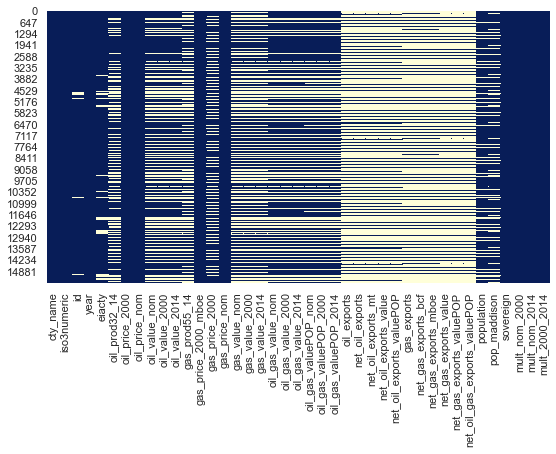

In [36]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [37]:
train=data.drop(columns=['oil_prod32_14','oil_price_2000','net_oil_gas_exports_valuePOP','oil_price_nom','oil_value_nom','oil_value_2000','oil_value_2014','gas_prod55_14','gas_price_2000_mboe','gas_price_2000','gas_price_nom','gas_value_nom','gas_value_2000','gas_value_2014','oil_gas_value_nom','oil_gas_value_2000','oil_gas_value_2014','oil_gas_valuePOP_nom','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','oil_exports','net_oil_exports','net_oil_exports_mt','net_oil_exports_value','net_oil_exports_valuePOP','gas_exports','net_gas_exports_bcf','net_gas_exports_mboe','net_gas_exports_value','net_gas_exports_valuePOP','net_gas_exports_valuePOP','population','pop_maddison'])
train

,cty_name,iso3numeric,id,year,eiacty,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,1,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,1,0.789705,1.085666,1.374774
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,1,0.765541,1.052445,1.374774
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,1,0.750020,1.031107,1.374774
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,1,0.739192,1.016222,1.374774


In [38]:
data

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.870000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,...,0.0,0.0,0.0,0.0,12571454.0,NaN,1,0.789705,1.085666,1.374774
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,...,0.0,0.0,0.0,0.0,12754378.0,NaN,1,0.765541,1.052445,1.374774
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,...,0.0,0.0,0.0,0.0,13724317.0,NaN,1,0.750020,1.031107,1.374774
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,...,0.0,NaN,NaN,NaN,14149648.0,NaN,1,0.739192,1.016222,1.374774


In [39]:
train #After removing the missing data

,cty_name,iso3numeric,id,year,eiacty,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,1,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,1,0.789705,1.085666,1.374774
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,1,0.765541,1.052445,1.374774
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,1,0.750020,1.031107,1.374774
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,1,0.739192,1.016222,1.374774


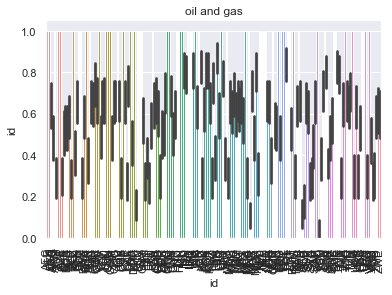

In [40]:
train[["mult_nom_2000", "sovereign"]].groupby(['sovereign'], as_index=False).sum().sort_values(by='mult_nom_2000', ascending=False)

sns.barplot(x='id', y='sovereign', data=train)
plt.ylabel("id")
plt.title("oil and gas")
plt.xticks(rotation=90)
plt.show()   #Appeared messy data

In [41]:
sns.set_style('whitegrid')



In [42]:
import sklearn 

In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
import sklearn

In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cty_name                      15521 non-null  object 
 1   iso3numeric                   15521 non-null  int64  
 2   id                            15106 non-null  object 
 3   year                          15521 non-null  int64  
 4   eiacty                        14254 non-null  object 
 5   oil_prod32_14                 10103 non-null  float64
 6   oil_price_2000                15503 non-null  float64
 7   oil_price_nom                 15521 non-null  float64
 8   oil_value_nom                 10103 non-null  float64
 9   oil_value_2000                10103 non-null  float64
 10  oil_value_2014                10103 non-null  float64
 11  gas_prod55_14                 8812 non-null   float64
 12  gas_price_2000_mboe           15521 non-null  float64
 13  g

In [46]:
data.describe()

,iso3numeric,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
count,15521.000000,15521.000000,1.010300e+04,15503.000000,15521.000000,1.010300e+04,1.010300e+04,1.010300e+04,8812.000000,1.552100e+04,...,4016.000000,3.880000e+03,3875.000000,3875.000000,1.290100e+04,1.180400e+04,15521.000000,15521.000000,15521.000000,1.552100e+04
mean,440.102055,1973.000000,1.834108e+07,26.513076,19.407381,4.049737e+09,4.777023e+09,6.567325e+09,100.702009,1.403597e+07,...,-0.357088,-1.944983e+07,60.045237,338.550092,2.822745e+07,2.729075e+07,0.676954,4.674194,6.425958,1.374774e+00
std,266.690184,23.959069,6.384938e+07,21.459869,27.819908,2.017801e+10,2.100122e+10,2.887193e+10,462.242415,1.102009e+07,...,146.611793,3.552873e+09,562.366542,2182.837956,9.860353e+07,9.488217e+07,0.467655,3.873224,5.324805,8.016068e-14
min,4.000000,1932.000000,0.000000e+00,7.879107,0.670000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-810.271076,-3.290943e+10,-918.095672,-7760.660272,2.510100e+04,2.510100e+04,0.000000,0.727393,1.000000,1.374774e+00
25%,204.000000,1952.000000,0.000000e+00,11.710310,1.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-5.524986,-8.709102e+07,-8.372933,-81.010366,2.194275e+06,2.108201e+06,0.000000,1.161943,1.597409,1.374774e+00
50%,422.000000,1973.000000,4.980000e+04,14.067980,3.290000,2.064857e+06,7.171990e+06,9.859862e+06,0.000000,1.472159e+07,...,0.000000,0.000000e+00,0.000000,0.000000,6.469000e+06,6.178436e+06,1.000000,3.876222,5.328927,1.374774e+00
75%,694.000000,1994.000000,4.025170e+06,36.535130,25.023256,3.808598e+08,6.935786e+08,9.535135e+08,21.684397,1.915340e+07,...,0.000000,0.000000e+00,0.000000,17.434919,1.932096e+07,1.863778e+07,1.000000,6.483330,8.913110,1.374774e+00
max,998.000000,2014.000000,6.160000e+08,85.170708,111.669702,4.044369e+11,3.401958e+11,4.676922e+11,5605.121816,4.877320e+07,...,1309.582987,6.281075e+10,11205.517349,32331.463722,1.364270e+09,1.331400e+09,1.000000,13.280064,18.257080,1.374774e+00


In [47]:
plt.hist(data.target,bins=50)

AttributeError: 'DataFrame' object has no attribute 'target'

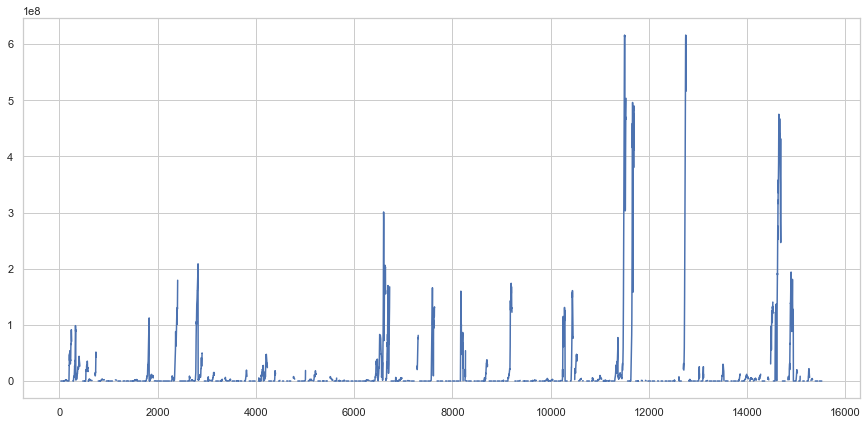

In [48]:
data["oil_prod32_14"].plot(figsize=(15,7))

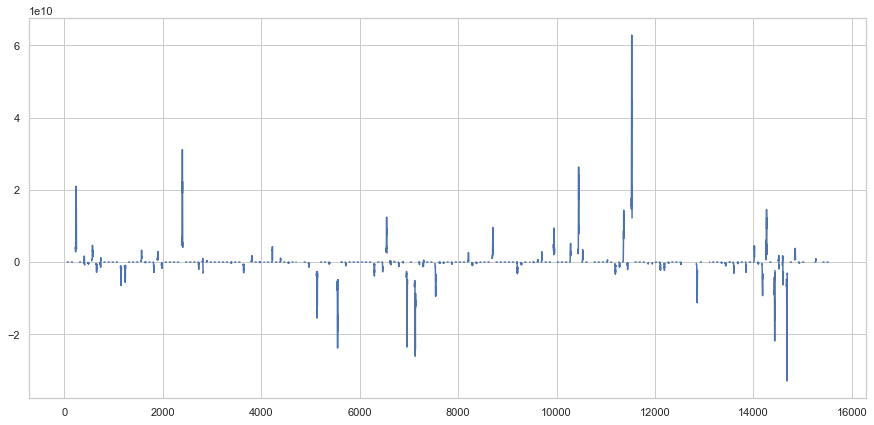

In [49]:
data['net_gas_exports_value'].plot(figsize=(15,7))

In [50]:
data.shape

(15521, 41)

In [51]:
data.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


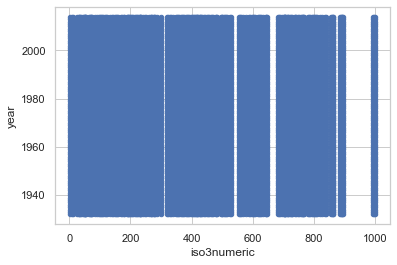

In [52]:
data.plot(kind='scatter',x='iso3numeric',y='year')

plt.show()

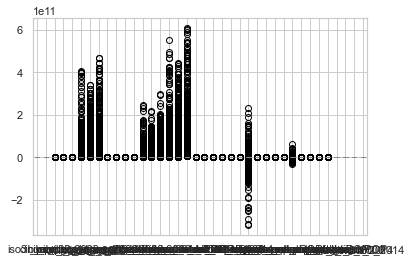

In [53]:
data.plot(kind='box')
plt.show()

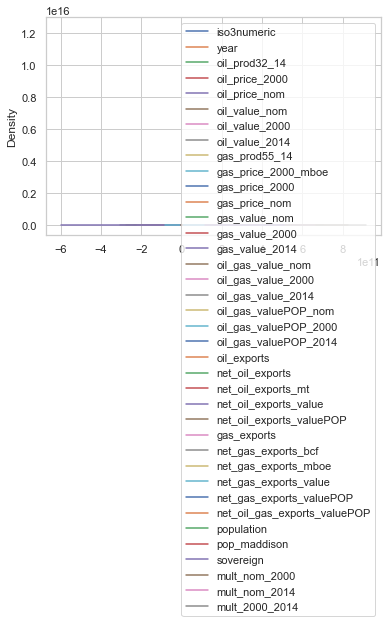

In [54]:
data.plot(kind='kde')
plt.show()

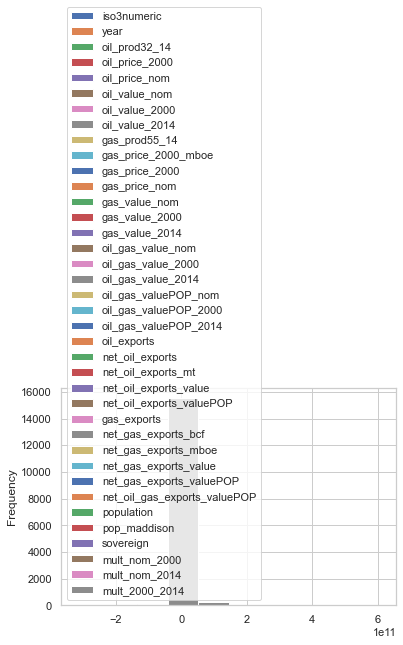

In [55]:
data.plot(kind='hist')
plt.show()

In [56]:
#data.plot(kind='bar')
#plt.show()

In [57]:
data.corr()

,iso3numeric,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
iso3numeric,1.000000e+00,0.000003,1.684619e-01,-8.131027e-04,4.835281e-06,8.180156e-02,1.159830e-01,1.159830e-01,1.600002e-01,4.734864e-07,...,-9.295806e-03,-1.406577e-02,3.150321e-02,5.297884e-02,-2.217824e-02,-2.167102e-02,-9.357282e-02,-1.723344e-06,-1.723344e-06,-4.677390e-14
year,2.894098e-06,1.000000,5.119359e-02,6.704532e-01,7.588546e-01,1.758271e-01,1.159146e-01,1.159146e-01,6.573628e-02,7.282500e-01,...,4.908981e-04,-4.811652e-03,5.018368e-02,5.656865e-02,5.854713e-02,5.779082e-02,4.471142e-01,-9.450846e-01,-9.450846e-01,0.000000e+00
oil_prod32_14,1.684619e-01,0.051194,1.000000e+00,4.054413e-02,3.377662e-02,6.922895e-01,8.423784e-01,8.423784e-01,7.971452e-01,3.689038e-02,...,2.902235e-01,2.680468e-01,7.316012e-02,2.481824e-01,2.539376e-01,2.496709e-01,-5.768573e-03,-5.809254e-02,-5.809254e-02,2.080099e-15
oil_price_2000,-8.131027e-04,0.670453,4.054413e-02,1.000000e+00,8.976705e-01,2.114471e-01,1.838305e-01,1.838305e-01,5.920993e-02,6.044272e-01,...,-1.001965e-03,-6.354150e-03,4.632371e-02,6.347541e-02,4.523656e-02,3.586866e-02,2.787834e-01,-5.838092e-01,-5.838092e-01,-2.598040e-14
oil_price_nom,4.835281e-06,0.758855,3.377662e-02,8.976705e-01,1.000000e+00,2.370158e-01,1.595050e-01,1.595050e-01,6.622207e-02,5.110941e-01,...,-7.004859e-04,-6.504221e-03,4.493309e-02,6.155927e-02,5.716991e-02,5.458412e-02,2.939245e-01,-5.937078e-01,-5.937078e-01,4.741590e-14
oil_value_nom,8.180156e-02,0.175827,6.922895e-01,2.114471e-01,2.370158e-01,1.000000e+00,9.037893e-01,9.037893e-01,6.120610e-01,9.213433e-02,...,2.683974e-01,2.576678e-01,7.959535e-02,2.617311e-01,2.133603e-01,2.138886e-01,2.842872e-02,-1.310075e-01,-1.310075e-01,-4.424863e-15
oil_value_2000,1.159830e-01,0.115915,8.423784e-01,1.838305e-01,1.595050e-01,9.037893e-01,1.000000e+00,1.000000e+00,7.009093e-01,9.909307e-02,...,2.782494e-01,2.685664e-01,8.147563e-02,2.688283e-01,2.206942e-01,2.069356e-01,4.309540e-03,-1.051479e-01,-1.051479e-01,1.766599e-15
oil_value_2014,1.159830e-01,0.115915,8.423784e-01,1.838305e-01,1.595050e-01,9.037893e-01,1.000000e+00,1.000000e+00,7.009093e-01,9.909307e-02,...,2.782494e-01,2.685664e-01,8.147563e-02,2.688283e-01,2.206942e-01,2.069356e-01,4.309540e-03,-1.051479e-01,-1.051479e-01,6.373652e-15
gas_prod55_14,1.600002e-01,0.065736,7.971452e-01,5.920993e-02,6.622207e-02,6.120610e-01,7.009093e-01,7.009093e-01,1.000000e+00,2.866308e-02,...,3.355855e-01,2.918339e-01,1.063988e-01,9.106626e-02,2.186097e-01,2.143425e-01,-4.644636e-02,-6.092182e-02,-6.092182e-02,-8.585124e-15
gas_price_2000_mboe,4.734864e-07,0.728250,3.689038e-02,6.044272e-01,5.110941e-01,9.213433e-02,9.909307e-02,9.909307e-02,2.866308e-02,1.000000e+00,...,-1.850197e-03,-1.107063e-03,7.174181e-02,5.428769e-02,2.616514e-02,3.391192e-02,3.538565e-01,-7.581839e-01,-7.581839e-01,4.353273e-14


In [86]:
oil=pd.DataFrame(data['mult_nom_2000'])

gas=pd.DataFrame(data['mult_nom_2014'])

In [87]:
oil.head()


,mult_nom_2000
0,12.599874
1,13.280064
2,12.853008
3,12.537882
4,12.420786


In [88]:
gas.head()

,mult_nom_2014
0,17.321973
1,18.257080
2,17.669975
3,17.236748
4,17.075768


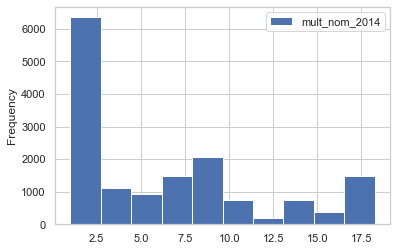

In [89]:
#oil['Afghanistan'].plot(figsize=(15,7))

gas.plot(kind='hist')
plt.show()

In [90]:
#Building linear regression model

lm=linear_model.LinearRegression()
model=lm.fit(oil,gas)

In [91]:
model.coef_

array([[1.37477352]])

In [92]:
model.intercept_

array([1.08304476e-11])

In [94]:
model.score(oil,gas) #Evaluate the model

1.0

In [131]:
oil_new=([17.075768],[17.075768])
gas_predict=model.predict(oil_new)
gas_predict

array([[23.47531367],
       [23.47531367]])

In [132]:
X=[1.2,1.3,1.6]
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y],axis=1,keys=['Oil_new','gas_predict'])
df

,Oil_new,gas_predict
,0,0
0,1.2,1.649728
1,1.3,1.787206
2,1.6,2.199638


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


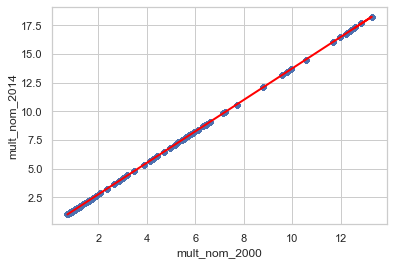

In [133]:
#Visualize the dataframe

data.plot(kind='scatter',x='mult_nom_2000',y='mult_nom_2014')

plt.plot(oil,model.predict(oil),color='red',linewidth=2)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


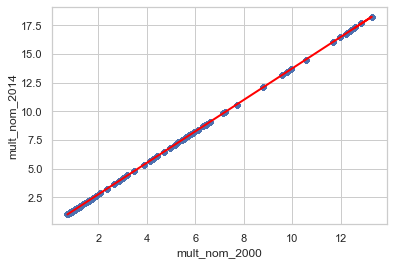

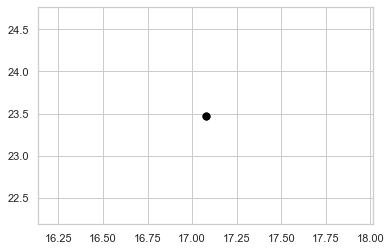

In [139]:
data.plot(kind='scatter',x='mult_nom_2000',y='mult_nom_2014')

plt.plot(oil,model.predict(oil),color='red',linewidth=2)

plt.show()

#Plotting the predicted values

plt.scatter(oil_new,gas_predict,color='black',linewidth=2)

plt.show()